Faathir Akbar Nugroho | 4522210033

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/placement.csv')
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No     55.0         Mkt&HR  58.80    

In [ ]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [ ]:
df.shape

(215, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


<Axes: xlabel='status', ylabel='count'>

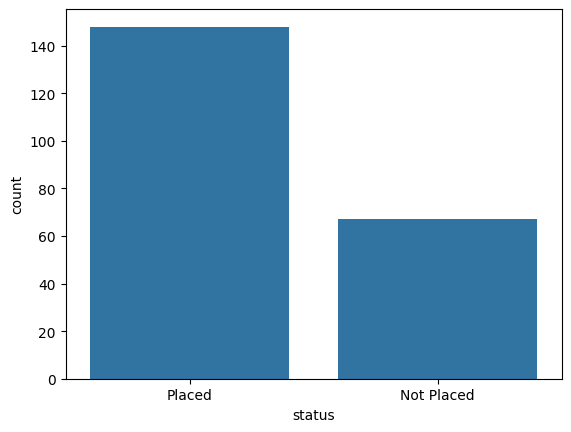

In [ ]:
import seaborn as sns
sns.countplot(x='status',data=df)

In [ ]:
genderp = pd.get_dummies(df['gender'])
genderp

,F,M
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
210,False,True
211,False,True
212,False,True
213,True,False


In [ ]:
le=LabelEncoder()
df['sl_no_n']=le.fit_transform(df['sl_no'])
df['gender_n']=le.fit_transform(df['gender'])
df['ssc_p_n']=le.fit_transform(df['ssc_p'])
df['ssc_b_n']=le.fit_transform(df['ssc_b'])
df['hsc_p_n']=le.fit_transform(df['hsc_p'])
df['hsc_b_n']=le.fit_transform(df['hsc_b'])
df['hsc_s_n']=le.fit_transform(df['hsc_s'])
df['degree_p_n']=le.fit_transform(df['degree_p'])
df['degree_t_n']=le.fit_transform(df['degree_t'])
df['workex_n']=le.fit_transform(df['workex'])
df['etest_p_n']=le.fit_transform(df['etest_p'])
df['specialisation_n']=le.fit_transform(df['specialisation'])
df['mba_p_n']=le.fit_transform(df['mba_p'])
df['status_n']=le.fit_transform(df['status'])

In [ ]:
df.drop(['sl_no','sl_no_n','gender','ssc_p','hsc_p','hsc_b', 'ssc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'], axis=1, inplace=True)
df

,gender_n,ssc_p_n,ssc_b_n,hsc_p_n,hsc_b_n,hsc_s_n,degree_p_n,degree_t_n,workex_n,etest_p_n,specialisation_n,mba_p_n,status_n
0,1,46,1,93,1,1,14,2,0,9,1,64,1
1,1,82,0,79,1,2,74,2,1,74,0,153,1
2,1,42,0,51,0,0,27,0,0,55,0,50,1
3,1,22,0,14,0,2,3,2,0,37,1,72,0
4,1,98,0,70,0,1,65,0,0,96,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,85,1,84,1,1,76,0,0,83,0,199,1
211,1,25,1,24,1,2,60,2,0,52,0,14,1
212,1,46,1,49,1,1,64,0,1,25,0,179,1
213,0,64,1,45,1,1,14,0,0,45,1,81,1


In [ ]:
X = df.iloc[:, :12].values
y = df.iloc[:, 12].values

In [ ]:
X

array([[  1,  46,   1, ...,   9,   1,  64],
       [  1,  82,   0, ...,  74,   0, 153],
       [  1,  42,   0, ...,  55,   0,  50],
       ...,
       [  1,  46,   1, ...,  25,   0, 179],
       [  0,  64,   1, ...,  45,   1,  81],
       [  1,  36,   0, ...,  80,   1,  80]])

In [ ]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)
df1 = pd.DataFrame({'Actual Status': y_test, 'Predicted Status': y_pred})

In [ ]:
df1 = pd.DataFrame({'Actual Status': y_test, 'Predicted Status': y_pred})

In [ ]:
df1

,Actual Status,Predicted Status
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
60,0,0
61,1,1
62,1,1
63,1,0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.85      0.87      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.76      0.76        65
weighted avg       0.80      0.80      0.80        65



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[13  7]
 [ 6 39]]


In [ ]:
print(accuracy_score(y_test, y_pred)*100)

80.0
